# ProblemSet3
## Hongsup Oh

# Library

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy.linalg import pinv, det
from numpy import matmul as mm
from numpy import pi, sqrt, power, exp
from skimage.io import imread

# 1. Simple Neural Network

## a. Derive the gradient descent update to $w_{1,2}^{[1]}$

\begin{align}
\text{Activation function for $h_1,h_2,h_3$ and o is sigmoid function.}\\
\sigma(z) = \frac{1}{1+\exp(-z)}\\
w^{[1]} = 
\begin{bmatrix}
w_{11}^{[1]}&w_{12}^{[1]}&w_{13}^{[1]}\\
w_{21}^{[1]}&w_{22}^{[1]}&w_{23}^{[1]}
\end{bmatrix}\\
w^{[2]}=
\begin{bmatrix}
w_{1}^{[2]}\\
w_{2}^{[2]}\\
w_{3}^{[2]}
\end{bmatrix}\\
l = \frac{1}{m}\sum_{i=1}^m (o^{(i)} - y^{(i)})^2\\
\end{align}
### Forwarding
\begin{align}
z^{[1]} = w^{[1]}x\\
\begin{bmatrix}
z_1^{[1]}\\
z_2^{[1]}\\
z_3^{[1]}
\end{bmatrix}
=
\begin{bmatrix}
w_{01}^{[1]}&w_{02}^{[1]}&w_{03}^{[1]}\\
w_{11}^{[1]}&w_{12}^{[1]}&w_{13}^{[1]}\\
w_{21}^{[1]}&w_{22}^{[1]}&w_{23}^{[1]}
\end{bmatrix}
\begin{bmatrix}
1\\
x_1\\
x_2
\end{bmatrix}
=
\begin{bmatrix}
w_{01}^{[1]}+w_{11}^{[1]}x_1+w_{21}^{[1]}x_2\\
w_{02}^{[1]}+w_{12}^{[1]}x_1+w_{22}^{[1]}x_2\\
w_{03}^{[1]}+w_{13}^{[1]}x_1+w_{23}^{[1]}x_2
\end{bmatrix}\\
\begin{bmatrix}
h_1\\
h_2\\
h_3
\end{bmatrix}
=
\begin{bmatrix}
\sigma(w_{01}^{[1]}+w_{11}^{[1]}x_1+w_{21}^{[1]}x_2)\\
\sigma(w_{02}^{[1]}+w_{12}^{[1]}x_1+w_{22}^{[1]}x_2)\\
\sigma(w_{03}^{[1]}+w_{13}^{[1]}x_1+w_{23}^{[1]}x_2)
\end{bmatrix}
=
\begin{bmatrix}
\sigma(z_1^{[1]})\\
\sigma(z_2^{[1]})\\
\sigma(z_3^{[1]})
\end{bmatrix}\\
z^{[2]} = w_0^{[2]} + w_1^{[2]}h_1 + w_2^{[2]}h_2 + w_3^{[2]}h_3\\
o = \sigma(z^{[2]})
\end{align}
### Backwarding
\begin{align}
\frac{\partial l}{\partial w_{1,2}^{[1]}} = \frac{\partial l}{\partial o^{(i)}}\frac{\partial o^{(i)}}{\partial h_2^{(i)}}\frac{\partial h_2^{(i)}}{\partial w_{(1,2)}^{[1]}}\\
\frac{\partial l}{\partial o^{(i)}} = 2(o^{(i)} - y^{(i)})\\
\frac{\partial o^{(i)}}{\partial h_2^{(i)}} = \sigma(w_0^{[2]} + w_1^{[2]}h_1 + w_2^{[2]}h_2 + w_3^{[2]}h_3)(1 - \sigma(w_0^{[2]} + w_1^{[2]}h_1 + w_2^{[2]}h_2 + w_3^{[2]}h_3))w_2^{[2]}\\
= o^{(i)}(1-o^{(i)})w_2^{[2]}\\
\frac{\partial h_2^{(i)}}{\partial w_{(1,2)}^{[1]}} = \sigma(w_{02}^{[1]}+w_{12}^{[1]}x_1+w_{22}^{[1]}x_2)(1 - \sigma(w_{02}^{[1]}+w_{12}^{[1]}x_1+w_{22}^{[1]}x_2))x_1^{(i)}\\
= h_2^{(i)}(1 - h_2^{(i)})x_1^{(i)}\\
\frac{\partial l}{\partial o^{(i)}}\frac{\partial o^{(i)}}{\partial h_2^{(i)}}\frac{\partial h_2^{(i)}}{\partial w_{(1,2)}^{[1]}} = 2(o^{(i)} - y^{(i)})o^{(i)}(1-o^{(i)})w_2^{[2]}h_2^{(i)}(1 - h_2^{(i)})x_1^{(i)}
\end{align}

In [15]:
def example_weights():
    w = {}

    w['hidden_layer_0_1'] = 0
    w['hidden_layer_1_1'] = 0
    w['hidden_layer_2_1'] = 0
    w['hidden_layer_0_2'] = 0
    w['hidden_layer_1_2'] = 0
    w['hidden_layer_2_2'] = 0
    w['hidden_layer_0_3'] = 0
    w['hidden_layer_1_3'] = 0
    w['hidden_layer_2_3'] = 0

    w['output_layer_0'] = 0
    w['output_layer_1'] = 0
    w['output_layer_2'] = 0
    w['output_layer_3'] = 0

    return w


def optimal_step_weights():
    w = example_weights()

    # *** START CODE HERE ***
    w['hidden_layer_0_1'] = 0.5
    w['hidden_layer_1_1'] = -1
    w['hidden_layer_2_1'] = 0
    w['hidden_layer_0_2'] = 0.5
    w['hidden_layer_1_2'] = 0
    w['hidden_layer_2_2'] = -1
    w['hidden_layer_0_3'] = -4
    w['hidden_layer_1_3'] = 1
    w['hidden_layer_2_3'] = 1

    w['output_layer_0'] = -0.5
    w['output_layer_1'] = 1
    w['output_layer_2'] = 1
    w['output_layer_3'] = 1
    # *** END CODE HERE ***

    return w

def optimal_linear_weights():
    w = example_weights()

    # *** START CODE HERE ***
    # *** END CODE HERE ***

    return w

In [16]:
step_weights = optimal_step_weights()
with open('step_weights', 'w') as f:
    json.dump(step_weights, f)
linear_weights = optimal_linear_weights()
with open('linear_weights', 'w') as f:
    json.dump(linear_weights, f)

# 2. KL divergence and Maximum Likelihood

## a. Nonnegativity

### Problem
\begin{align}
\text{$\forall$ P and Q, $D_{KL} = \sum_{x\in \chi} p(x)\log\frac{p(x)}{Q(x)}$}\\
\end{align}
### Jensen's inequality
\begin{align}
\sum_{x\in\chi} P(x)\log\frac{P(x)}{Q(x)}\leq \log\sum_{x\in\chi}P(x)\frac{P(x)}{Q(x)}\\
E_{x\sim P(x)} (\log\frac{P(x)}{Q(x)})\leq \log (E_{x\sim P(x)}(\frac{P(x)}{Q(x)}))\\
\end{align}
### Solve
\begin{align}
-D_{KL}(P||Q) = -E_{x\sim P(x)}(\log \frac{P(x)}{Q(x)})\\
=E_{x\sim P(x)}(\log \frac{Q(x)}{P(x)})\\
\leq \log(E_{x\sim P(x)}(\frac{Q(x)}{P(x)}))\\
= \log1 = 0\\
\text{Thus, $D_{KL}(P||Q)$ is nonnegative}\\
\end{align}

## b. Chain rule for KL divergence

### Problem
$D_{KL}(P(X|Y)||Q(X|Y)) = \sum_{y}P(y)(\sum_{x}P(x|y)\log\frac{P(x|y)}{Q(x|y)})$
<br>
Prove
<br>
$D_{KL}(P(X,Y)||Q(X,Y)) = D_{KL}(P(X)||Q(X))+D_{KL}(P(Y|X)||Q(Y|X))$
### Prove
\begin{align}
D_{KL}(P(X,Y)||Q(X,Y)) = \sum_{x,y}P(x,y)\log\frac{P(x,y)}{Q(x,y)}\\
= \sum_{x,y}P(x,y)\log\frac{P(y|x)P(x)}{Q(y|x)Q(x)}\\
= \sum_{x,y}P(x,y)\log\frac{P(x)}{Q(x)}+\sum_{x}P(x)(\sum_{y}P(y|x)\log\frac{P(y|x)}{Q(y|x)})\\
= \sum_{x,y}P(x)\log\frac{P(x)}{Q(x)}+\sum_{x}P(x)(\sum_{y}P(y|x)\log\frac{P(y|x)}{Q(y|x)})\\
= D_{KL}(P(X)||Q(X))+D_{KL}(P(Y|X)||Q(Y|X))\\
\end{align}

## c. KL and maximum likelihood

### Problem
Prove
<br>
$argmin_{\theta} D_{KL}(\hat P||P_{\theta}) = argmax_{\theta}\sum_{i=1}^m \log P_{\theta}(x^{(i)})$
### Prove
\begin{align}
argmin_{\theta} D_{KL}(\hat p||p_{\theta}) = argmin_{\theta}(\sum_{x in \chi}\hat P\log\frac{\hat P}{P_{\theta}})\\
= argmin_{\theta}\sum_{x\in\chi}\hat P \log \hat P - argmin_{\theta}\sum_{x\in\chi}\hat P \log P_{\theta}\\
\text{Since the equation is a function of $\theta$, thus, $\hat P$ term is constant}\\
\sim - argmin_{\theta}\sum_{x\in\chi}\log P_{\theta}\\
= argmax_{\theta}\sum_{x\in\chi}\log P_{\theta}\\
\end{align}

# 3. KL Divergence, Fisher Information, and the Natural Gradient

## a. Score function

### Problem
The score function associated with $p(y;\theta)$ is defined as $\nabla_{\theta} \log p(y;\theta)$, which signifies the sensitivity of the likelihood function with respect to the parameters.
<br>
Recall that $E_{y\sim p(y)}[g(y)] = \int_{-\infty}^{\infty} p(y)g(y)dy$.
<br>
Show that the expected value of the score is 0.
<br>
$E_{y\sim p(y;\theta)}[\nabla_{\theta'}\log p(y;\theta')|_{\theta'=\theta}] = 0$
### Prove
\begin{align}
E_{y\sim p(y;\theta)}[\nabla_{\theta'}\log p(y;\theta')|_{\theta'=\theta}]\\
= \int_{-\infty}^{\infty} p(y;\theta)\frac{\partial}{\partial\theta}\log p(y;\theta) dy\\
\text{where, $\frac{\partial}{\partial \theta}\log p(y;\theta) = \frac{1}{p(y;\theta)}\frac{\partial}{\partial \theta}p(y;\theta)$}\\
= \int_{-\infty}^{\infty} p(y;\theta)\frac{1}{p(y;\theta)}\frac{\partial}{\partial \theta}p(y;\theta)) dy\\
= \frac{\partial}{\partial \theta}\int_{-\infty}^{\infty} p(y;\theta)) dy\\
= \frac{\partial}{\partial \theta}(1)\\
=0\\
\end{align}

## b. Fisher Information

### Problem
Fisher information is defined as the covariance matrix of the score function.
<br>
$L(\theta) = Cov_{y\sim p(y;\theta)}[\nabla_{\theta'}\log p(y;\theta')|_{\theta'=\theta}]$
<br>
Show that Fisher information can equivalently be given by
<br>
$L(\theta) = E_{y\sim p(y;\theta)}[\nabla_{\theta'}\log p(y;\theta')\nabla_{\theta'}\log p(y;\theta')]$
### Prove
\begin{align}
L(\theta) = Cov_{y\sim p(y;\theta)}[\nabla_{\theta'}\log p(y;\theta')|_{\theta'=\theta}]\\
\text{where, $Cov(x) = E[(x-E[x])(x-E[x])^T]$ and $E[x] = 0$}\\
= E_{y\sim p(y;\theta)}[(\nabla_{\theta'}\log p(y;\theta')-0)(\nabla_{\theta'}\log p(y;\theta')-0)|_{\theta'=\theta}]\\
= E_{y\sim p(y;\theta)}[\nabla_{\theta'}\log p(y;\theta')\nabla_{\theta'}\log p(y;\theta')|_{\theta'=\theta}]\\
\end{align}

## c. Fisher Information (alternate form)

### Problem
Fisher Information can not only be defined as the covariance of the score function,
<br>
but in most situations it can also be represented as the expectated negative Hessian of the log-likelihood
<br>
Show that $E_{y\sim p(y;\theta')}[-\nabla_{\theta'}^2\log p(y;\theta')|_{\theta'=theta}] = L(\theta)$
### Prove 1.
\begin{align}
E_{y\sim p(y;\theta')}[-\nabla_{\theta'}^2\log p(y;\theta')|_{\theta'=theta}]\\
= E_{y\sim p(y;\theta')}[-\nabla_{\theta'}(\frac{1}{p(y;\theta'}\nabla_{\theta'}p(y;\theta'))|_{\theta'=theta}]\\
= E_{y\sim p(y;\theta')}[\frac{\nabla_{\theta'}p(y;\theta')\nabla_{\theta'}p(y;\theta')}{p(y;\theta')p(y;\theta')} - \frac{\nabla_{\theta'}p(y;\theta')^2}{p(y;\theta')}|_{\theta'=theta}]\\
= E_{y\sim p(y;\theta')}[\nabla_{\theta'}\log p(y;\theta')\nabla_{\theta'}\log p(y;\theta')|_{\theta'=theta}] - \int_{-\infty}^{\infty} p(y;\theta)\frac{\nabla_{\theta}^2 p(y;\theta)}{p(y;\theta)}dy\\
\text{Second term becomes zero, because it is mean of score function}\\
= L(\theta)
\end{align}
### Prove 2. (H is Hessian)
\begin{align}
H_{\log p(y;\theta)} = J(\nabla_{\theta}\log p(y;\theta)) = J(\frac{\nabla_{\theta}p(y;\theta)}{p(y;\theta)})\\
= \frac{\nabla_{\theta}^2p(y;\theta)}{p(y;\theta)}-\frac{\nabla_{\theta}p(y;\theta)\nabla_{\theta}p(y;\theta)^T}{p(y;\theta)p(y;\theta)}\\
= \frac{H_{p(y;\theta)}}{p(y;\theta)} - (\frac{\nabla_{\theta}p(y;\theta)}{p(y;\theta)})(\frac{\nabla_{\theta}p(y;\theta)}{p(y;\theta)})^T\\
E_{y\sim p(y;\theta)}[H_{\log p(y;\theta)}] = E_{y\sim p(y;\theta)}[\frac{H_{p(y;\theta)}}{p(y;\theta)}] - E_{y\sim p(y;\theta)}[\nabla_{\theta}\log p(y;\theta)\nabla_{\theta}\log p(y;\theta)^T]\\
= \int_{-\infty}^{\infty}p(y;\theta)\frac{H_{p(y;\theta)}}{p(y;\theta)} - E_{y\sim p(y;\theta)}[\nabla_{\theta}\log p(y;\theta)\nabla_{\theta}\log p(y;\theta)^T]\\
= H_{\int p(y;\theta)dy} - E_{y\sim p(y;\theta)}[\nabla_{\theta}\log p(y;\theta)\nabla_{\theta}\log p(y;\theta)^T]\\
= H_1 - E_{y\sim p(y;\theta)}[\nabla_{\theta}\log p(y;\theta)\nabla_{\theta}\log p(y;\theta)^T]\\
= 0 - E_{y\sim p(y;\theta)}[\nabla_{\theta}\log p(y;\theta)\nabla_{\theta}\log p(y;\theta)^T]\\
= -E_{y\sim p(y;\theta)}[\nabla_{\theta}\log p(y;\theta)\nabla_{\theta}\log p(y;\theta)^T]\\
= - L(\theta)
\end{align}

## d. Approximating $D_{KL}$ with Fisher Information

### Problem
Show that $D_{KL}(P_{\theta}||P_{\theta +d}) \approx \frac{1}{2}d^TL(\theta)d$
<br>
Recall that the Taylor Series allows us to approximate a scalar function $f(\tilde \theta)$ near by $\theta$ by:
<br>
$f(\theta') \approx f(\theta)+(\tilde \theta-\theta)^T\nabla_{\theta'=\theta}f(\theta')|_{\theta'=\theta} + \frac{1}{2}(\tilde \theta-\theta)^T(\nabla_{\theta'=\theta}^2f(\theta')|_{\theta'=\theta})(\tilde \theta-\theta)$
<br>
Where $\tilde \theta = \theta +d$
### Prove
\begin{align}
D_{KL}(P_{\theta}||P_{\theta+d}) \approx D_{KL}(P_{\theta}||P_{\theta}) + d^T\nabla_{\theta'}D_{KL}(P_{\theta}||P_{\theta'})|_{\theta' = \theta} + \frac{1}{2} d^T\nabla_{\theta}^2 D_{KL}(P_{\theta}||P_{\theta'})|_{\theta'=\theta}d\\
\approx 0 + d^T E_{y\sim p(y;\theta)}[\nabla_{\theta}\log p(y;\theta)] + \frac{1}{2}d^TE_{y\sim p(y;\theta)}[\nabla_{\theta}\log p(y;\theta)\nabla_{\theta}\log p(y;\theta)^T]d\\
\approx 0 + d^T0 + \frac{1}{2}d^TL(\theta)d\\
\approx \frac{1}{2}d^TL(\theta)d\\
\end{align}

## e. Natural Gradient

### Problem
We will set up the constrained optimization problem that will yield the natural gradient update d.
<br>
Let the log-likelihood objective be $l(\theta) = \log p(y;\theta)$.
<br>
Let the $D_{KL}$ distance we want to move by, be some small position constant c.
<br>
The natrual gradient update $d^*$is
<br>
$d^* = argmax_{d}l(\theta +d)$ subject to $D_{KL}(p_{\theta}||p_{\theta+d})=c$
<br>
In order to solve this constrained optimization problem, we employ the the method of Lagrange multipliers.
<br>
Consider the following constrained optimization problem
<br>
$d^*=argmax_{d}f(d)$ subject to $g(d) = c$
<br>
The function f is the objective function and g is the constrint. We instead optimize the Lagrange $L(d,\lambda)$
<br>
$L(d,\lambda) = f(d) - \lambda[g(d)-c]$
<br> 
solve two equations to get d and $\lambda$
<br>
$\nabla_d L(d,\lambda) = 0$
<br>
$\nabla_{\lambda} L(d,\lambda) = 0$
### Solve
\begin{align}
l(\theta) = \log p(y;\theta)\\
l(\theta +d) \approx l(\theta) +d^T\nabla_{\theta'}l(\theta')|_{\theta' = theta}\\
\approx \log p(y;\theta) + d^T\nabla_{\theta'}\log p(y;\theta)|_{\theta' = theta}\\
L(d,\lambda) = l(\theta+d) - \lambda[D_{KL}(P_{\theta}||P_{\theta+d})-c]\\
= \log p(y;\theta) + d^T\nabla_{\theta'}\log p(y;\theta')|_{\theta' = theta} - \lambda[\frac{1}{2}d^TL(\theta)d-c]\\
\nabla_{d}L(d,\lambda) = \nabla_{\theta'} \log p(y;\theta')|_{\theta'=\theta} - \lambda L(\theta)d = 0\\
\nabla_{\lambda} L(d,\lambda) = -\frac{1}{2}d^T L(\theta)d + c = 0\\
\text{Solve $\nabla_{d}L(d,\lambda) = 0$}\\
d = \frac{1}{\lambda} L(\theta)^{-1}\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta}\\
\text{Insert d into $\nabla_{\lambda} L(d,\lambda)=0$}\\
\frac{1}{2}(\frac{1}{\lambda}L(\theta)^{-1}\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta})^TL(\theta)(\frac{1}{\lambda}L(\theta)^{-1}\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta}) = c\\
\frac{1}{2c}(L(\theta)^{-1}\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta})^TL(\theta)(L(\theta)^{-1}\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta}) = \lambda^2\\
\lambda = \sqrt{\frac{1}{2c}(L(\theta)^{-1}\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta})^TL(\theta)(L(\theta)^{-1}\nabla_{\theta'}\log p(y;\theta')|_{\theta' = \theta})}\\
\end{align}

## f. Relation to Newton's Method

If x is fixed, and you are trying to maximize the conditional likelihood
<br>
$l(y,\theta) = p(y|x;\theta)$ this is true
<br>
The natural gradient update rule:
<br>
$\theta := \theta + \alpha L(\theta)^{-1}\nabla_{\theta}l(y,\theta)$
<br>
The Newton rule:
<br>
$\theta := \theta - H^{-1}\nabla_{\theta}l(y,\theta)$ 
<br>
Note that:
<br>
$L(\theta)^{-1} = E_{y\sim p(y|x;\theta)}[-\nabla_{\theta}^2l(y;\theta)] = E_{y\sim p(y|x;\theta)}[-H^{-1}]$
<br>
$L(\theta) = H^{-1}$

# 4. Semi-supervised EM and GMM

## Problem

\begin{align}
l_{unsup}(\theta) = \sum_{i=1}^m \log p(x^{(i)};\theta)\\
= \sum_{i=1}^m \log \sum_{z^{(i)}} p(x^{(i)},z^{(i)};\theta)\\
l_{sup}(\theta) = \sum_{i=1}^{\tilde m} \log p(\tilde x^{(i)}, \tilde z^{(i)};\theta)\\
l_{semi-sup}(\theta) = l_{unsup}(\theta) + \alpha l_{sup}(\theta)\\
\end{align}
### E-Step
\begin{align}
Q_{i}^{t}(z^{(i)}):=p(z^{(i)}|x^{(i)};\theta^{(i)})
\end{align}
### M-Step
\begin{align}
\theta^{(t+1)}:=argmax_{\theta}[\sum_{i=1}^m(\sum_{z^{(i)}} Q_{i}^{(t)}(z^{(i)})\log \frac{p(x^{(i)},z^{(i)};\theta)}{Q_{i}^{(t)}(z^{(i)})} ) + \alpha(\sum_{i=1}^{\tilde m} log p(\tilde x^{(i)},\tilde z^{(i)};\theta))]
\end{align}

## a. Convergence (Jensen's inequality)

\begin{align}
l_{semi-sup}(\theta^{(t)}) = \sum_{i}\sum_{z^{(i)}}Q_i^{(t)}(z^{(i)})\log\frac{p(x^{(i)},z^{(i)};\theta^{(t)})}{Q_i^{(t)}(z^{(i)})} + \alpha l_{sup}\\
l_{semi-sup}(\theta^{(t+1)}) = \sum_{i}\log\sum_{z^{(i)}}Q_i^{(t)}(z^{(i)})\frac{p(x^{(i)},z^{(i)};\theta^{(t+1)})}{Q_i^{(t)}(z^{(i)})} + \alpha l_{sup}\\
\geq \sum_{i}\sum_{z^{(i)}}Q_i^{(t)}(z^{(i)})\log\frac{p(x^{(i)},z^{(i)};\theta^{(t+1)})}{Q_i^{(t)}(z^{(i)})} + \alpha l_{sup}\\
\geq \sum_{i}\sum_{z^{(i)}}Q_i^{(t)}(z^{(i)})\log\frac{p(x^{(i)},z^{(i)};\theta^{(t)})}{Q_i^{(t)}(z^{(i)})} + \alpha l_{sup}\\
= l_{semi-sup}(\theta^{(t)})
\end{align}

## b. Semi-supervised E-Step

\begin{align}
Q(z^{(i)}) = p(z^{(i)}=j|x^{(i)};\phi,\mu,\Sigma)\\
= \frac{p(x^{(i)}|z^{(i)}=j;\mu,\Sigma)p(z^{(i)};\phi)}{\sum_{l=1}^k p(x^{(i)}|z^{(i)}=l;\mu, \Sigma)p(z^{(i)};\phi)}\\
= \frac{\frac{1}{(2\pi)^{n/2}|\Sigma_i|^{1/2}}\exp(-\frac{1}{2}(x^{(i)}-\mu_j)^T\Sigma_j^{-1}(x^{(i)}-\mu_j))\phi_j}{\sum_{l=1}^k\frac{1}{(2\pi)^{n/2}|\Sigma_l|^{1/2}}\exp(-\frac{1}{2}(x^{(i)}-\mu_l)^T\Sigma_l^{-1}(x^{(i)}-\mu_l)}
\end{align}

## c. Semi-supervised M-Step

### Problem
\begin{align}
w_j^{(i)} = Q_i(z^{(i)}=j) = p(z^{(i)}=j|x^{(i)};\phi,\mu,\Sigma)\\
\tilde w_j^{(i)} = Q_i(\tilde z^{(i)}=j) = p(\tilde z^{(i)}=j|\tilde x^{(i)};\phi,\mu,\Sigma)\\
l = \sum_{i=1}^m\sum_{z^{(i)}} Q_i(z^{(i)})\log\frac{p(x^{(i)},z^{(i)};\phi,\mu,\Sigma)}{Q_i(z^{(i)})}+\alpha \sum_{i=1}^{\tilde m}\sum_{\tilde z^{(i)}} Q_i(\tilde z^{(i)})\log\frac{p(\tilde x^{(i)},\tilde z^{(i)};\phi,\mu,\Sigma)}{Q_i(\tilde z^{(i)})}\\
l = \sum_{i=1}^m\sum_{j=1}^k w_j^{(i)}\log\frac{p(x^{(i)}|z^{(i)};\mu,\Sigma)p(z^{(i)}=j;\phi_j)}{w_j^{(i)}}+\alpha \sum_{i=1}^{\tilde m}\sum_{j=1}^k \tilde w_j^{(i)}\log\frac{p(\tilde x^{(i)}|\tilde z^{(i)};\mu,\Sigma)p(\tilde z^{(i)}=j;\phi_j)}{\tilde w_j^{(i)}}\\
l = \sum_{i=1}^m\sum_{j=1}^k w_j^{(i)}\log\frac{\frac{1}{(2\pi)^{n/2}|\Sigma_i|^{1/2}}\exp(-\frac{1}{2}(x^{(i)}-\mu_j)^T\Sigma_j^{-1}(x^{(i)}-\mu_j))\phi_j}{w_j^{(i)}}+\alpha \sum_{i=1}^{\tilde m}\sum_{j=1}^k \tilde w_j^{(i)}\log\frac{\frac{1}{(2\pi)^{n/2}|\Sigma_i|^{1/2}}\exp(-\frac{1}{2}(\tilde x^{(i)}-\mu_j)^T\Sigma_j^{-1}(\tilde x^{(i)}-\mu_j))\phi_j)}{\tilde w_j^{(i)}}\\
\end{align}

### (1). $\mu_l$
\begin{align}
\nabla_{\mu_j}(l)\\
\nabla_{\mu_j}(\sum_{i=1}^m\sum_{j=1}^k w_j^{(i)}\log\frac{\frac{1}{(2\pi)^{n/2}|\Sigma_i|^{1/2}}\exp(-\frac{1}{2}(x^{(i)}-\mu_j)^T\Sigma_j^{-1}(x^{(i)}-\mu_j))\phi_j}{w_j^{(i)}}+\alpha \sum_{i=1}^{\tilde m}\sum_{j=1}^k \tilde w_j^{(i)}\log\frac{\frac{1}{(2\pi)^{n/2}|\Sigma_i|^{1/2}}\exp(-\frac{1}{2}(\tilde x^{(i)}-\mu_j)^T\Sigma_j^{-1}(\tilde x^{(i)}-\mu_j))\phi_j)}{\tilde w_j^{(i)}})\\
\nabla_{\mu_j} (\sum_{i=1}^m\sum_{j=1}^k w_j^{(i)}(-\frac{1}{2}(x^{(i)}-\mu_j)^T\Sigma_j^{-1}(x^{(i)}-\mu_j)) + \alpha \sum_{i=1}^{\tilde m}\sum_{j=1}^k \tilde w_j^{(i)}(-\frac{1}{2}(\tilde x^{(i)}-\mu_j)^T\Sigma_j^{-1}(\tilde x^{(i)}-\mu_j))\\
\nabla_{\mu_j} (-\frac{1}{2}\sum_{i=1}^m\sum_{j=1}^k w_j^{(i)}(x^{(i)^T}\Sigma_j^{-1}x^{(i)}-x^{(i)^T}\Sigma_j^{-1}\mu^{(i)}-\mu_j^T\Sigma_j^{-1}x^{(i)}+ \mu_j^T\Sigma_j^{-1}\mu_j)-\frac{1}{2}\alpha \sum_{i=1}^\tilde m\sum_{j=1}^k \tilde w_j^{(i)}(\tilde x^{(i)^T}\Sigma_j^{-1}\tilde x^{(i)}-\tilde x^{(i)^T}\Sigma_j^{-1}\mu^{(i)}-\mu_j^T\Sigma_j^{-1}\tilde x^{(i)}+ \mu_j^T\Sigma_j^{-1}\mu_j))\\
-\frac{1}{2}\sum_{i=1}^m w_l^{(i)}(-2\Sigma_l^{-1}x^{(i)}+2\Sigma_l^{-1}\mu_l)-\frac{1}{2}\sum_{i=1}^{\tilde m} \tilde w_l^{(i)} (-2\Sigma_l^{-1}\tilde x^{(i)}+2\Sigma_l^{-1}\mu_l)\\
\sum_{i=1}^m w_l^{(i)}(\Sigma_l^{-1}x^{(i)}-\Sigma_l^{-1}\mu_l)+\alpha\sum_{i=1}^{\tilde m}\tilde w_l^{(i)}(\Sigma_l^{-1}\tilde x^{(i)}-\Sigma_l^{-1}\mu_l)=0\\
\mu_l = \frac{\sum_{i=1}^m w_j^{(i)}x^{(i)} + \alpha\sum_{i=1}^{\tilde m}\tilde w_j^{(i)}\tilde x^{(i)}}{\sum_{i=1}^m w_j^{(i)} + \alpha\sum_{i=1}^{\tilde m}\tilde w_j^{(i)}\tilde x^{(i)}}\\
\end{align}

### (2). $\phi_l$
\begin{align}
\sum_{i=1}^m\sum_{j=1}^k w_j^{(i)}\log\phi_j + \alpha\sum_{i=1}^{\tilde m}\sum_{j=1}^k \tilde w_j^{(i)}\log\phi_j\\
\text{subect to $\sum_{j=1}^k \phi_j=1$}\\
\text{we construct the Lagrangian}\\
L(\phi,\beta) = \sum_{i=1}^m\sum_{j=1}^k w_j^{(i)}\log\phi_j + \alpha\sum_{i=1}^{\tilde m}\sum_{j=1}^k \tilde w_j^{(i)}\log \phi_j + \beta(1-\sum_{j=1}^k\phi_j)\\
\frac{\partial L(\phi,\beta)}{\partial \phi_l} = \sum_{i=1}^m \frac{w_l^{(i)}}{\phi_l} + \alpha\sum_{i=1}^{\tilde m}\frac{\tilde w_l^{(i)}}{\phi_l} - \beta = 0\\
\phi_l = \frac{\sum_{i=1}^m w_l^{(i)}+\alpha\sum_{i=1}^{\tilde m}\tilde w_l^{(i)}}{\beta}\\
\text{consider $\beta = \sum_{i=1}^m\sum_{j=1}^k w_j^{(i)} + \alpha\sum_{i=1}^{\tilde m}\sum_{j=1}^k \tilde w_j^{(i)} = \sum_{i=1}^m 1 + \alpha\sum_{i=1}^{\tilde m} 1 = m + \alpha\tilde m$}\\
\phi_l = \frac{\sum_{i=1}^m w_l^{(i)}+\alpha\sum_{i=1}^{\tilde m}\tilde w_l^{(i)}}{m + \alpha\tilde m}\\
\end{align}

### (3). $\Sigma_l$
\begin{align}
\nabla_{\Sigma_l} (\sum_{i=1}^m\sum_{j=1}^k w_j^{(i)}(-\frac{1}{2}\log|\Sigma_j|-\frac{1}{2}(x^{(i)} - \mu_j)^T\Sigma_j^{-1}(x^{(i)}-\mu_j)) + \alpha\sum_{i=1}^\tilde m\sum_{j=1}^k\tilde w_j^{(i)}(\tilde x^{(i)} - \mu_j)^T\Sigma_j^{(i)}(\tilde x^{(i)} - \mu_j))\\
\text{where, $\frac{\partial\log|x|}{\partial x} = x^T$ and $\frac{\partial \alpha^Tx^{-1}\beta}{\partial x} = -x^{-T}\alpha^T\beta x^{-T}$}\\
\sum_{i=1}^m w_l^{(i)}(-\frac{1}{2}\Sigma_l^T +\frac{1}{2}\Sigma^{-T}(x^{(i)}-\mu_j)^T(x^{(i)}-\mu_j)\Sigma^{-T})+\alpha \sum_{i=1}^\tilde m \tilde w_l^{(i)}(-\frac{1}{2}\Sigma_l^T +\frac{1}{2}\Sigma^{-T}(\tilde x^{(i)}-\mu_j)^T(\tilde x^{(i)}-\mu_j)\Sigma^{-T}) = 0\\
\sum_{i=1}^m w_l^{(i)}(-1 + \Sigma^{-T}(x^{(i)}-\mu_j)^T(x^{(i)}-\mu_j)) +\alpha \sum_{i=1}^\tilde m \tilde w_l^{(i)}(-1 + \Sigma^{-T}(\tilde x^{(i)}-\mu_j)^T(\tilde x^{(i)}-\mu_j)) = 0\\
\sum_{i=1}^m w_l^{(i)} + \alpha \sum_{i=1}^{\tilde m}\tilde w_l^{(i)} = \sum_{i=1}^m w_l^{(i)}(\Sigma_l^{-T}(x^{(i)}-\mu_l)^T(x^{(i)}-\mu_l)) + \alpha \sum_{i=1}^\tilde m \tilde w_l^{(i)}(\Sigma_l^{-T}(\tilde x^{(i)}-\mu_l)^T(\tilde x^{(i)}-\mu_l))\\
\Sigma_l = \frac{\sum_{i=1}^m w_l^{(i)}(\Sigma_l^{-T}(x^{(i)}-\mu_l)^T(x^{(i)}-\mu_l)) + \alpha \sum_{i=1}^\tilde m \tilde w_l^{(i)}(\Sigma_l^{-T}(\tilde x^{(i)}-\mu_l)^T(\tilde x^{(i)}-\mu_l))}{\sum_{i=1}^m w_l^{(i)} + \alpha \sum_{i=1}^{\tilde m}\tilde w_l^{(i)}}
\end{align}

## d and e (Classical and Semi-supervised EM implementation)

In [3]:
PLOT_COLORS = ['red','green','blue','orange']
K = 4           # Number of Gaussians in the mixture model
NUM_TRIALS = 3  # Number of trials to run (can be adjusted for debugging)
UNLABELED = -1  # Cluster label for unlabeled data points (do not change)

In [4]:
def main(is_semi_supervised, trial_num):
    print('Running {} EM algorithm...'
         .format('semi-supervised' if is_semi_supervised else 'unsupervised'))
    
    # Load dataset
    train_path = os.path.join('data','ds3_train.csv')
    print(train_path)
    x,z = load_gmm_dataset(train_path)
    x_tilde = None
    
    if is_semi_supervised:
        # Split into labeled and unlabeled examples
        labeled_idxs = (z != UNLABELED).squeeze()
        x_tilde = x[labeled_idxs,:]  # Labeled examples
        z = z[labeled_idxs, :]       # Corresponding labels
        x = x[~labeled_idxs, :]      # Unlabeled examples
    
    # x (m, K)
    m = x.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    # find the K groups
    groups = np.array_split(x[indices], K, axis=0)
    # initialize mu and sigma
    mu = []
    sigma = []
    for g in groups:
        # g (n, K) mu (K)
        this_mu = g.mean(axis=0)
        this_sigma = (x - this_mu).T.dot(x - this_mu) / g.shape[0]
        mu.append(this_mu)
        sigma.append(this_sigma)
    
    phi = np.ones(K)/K
    w = np.ones((m,K)) / K
    
    if is_semi_supervised:
        w = run_semi_supervised_em(x, x_tilde, z, w, phi, mu, sigma)
    else:
        w = run_em(x, w, phi, mu, sigma)
    
    # plot your predictions
    z_pred = np.zeros(m)
    if w is not None:
        for i in range(m):
            z_pred[i] = np.argmax(w[i])
    
    plot_gmm_preds(x, z_pred, is_semi_supervised, plot_id = trial_num)

In [5]:
def run_em(x, w, phi, mu, sigma):
    eps = 1e-3
    max_iter = 1000
    
    it = 0
    ll = prev_ll = None
    while it < max_iter and (prev_ll is None or np.abs(ll - prev_ll)>=eps):
        prev_ll = ll
        
        def gaussian(x, mu, sigma):
            m, n  = x.shape
            x = x[:,:, None]
            mu = mu[:, None]
            x_T = x.transpose(0,2,1)
            mu_T = mu.T
            term = -0.5*mm(x_T - mu_T, mm(pinv(sigma),x-mu))[:,0,0]
            return (1/(power(2*pi,n/2) * sqrt(det(sigma)))*exp(term))
        
        m,n = x.shape
        k = len(mu)
        # loop over k to update w
        for j, (mu_j,sigma_j) in enumerate(zip(mu,sigma)):
            w[:,j] = gaussian(x, mu_j, sigma_j) * phi[j]
        # normalize
        w = w / w.sum(axis=1, keepdims=True)
        
        # update mu and sigma
        for j in range(k):
            mu[j] = w[:,j].dot(x)/w[:,j].sum()
            sigma[j] = (x - mu[j]).T.dot(np.diag(w[:,j])).dot(x - mu[j]) / w[:, j].sum()
        # update phi
        phi = w.sum(axis=0)
        phi = phi / phi.sum()
        
        # compute log likelihood
        p_x = np.zeros(m)
        for j in range(k):
            p_x_given_z = gaussian(x, mu[j], sigma[j])
            p_x += p_x_given_z*phi[j]
        
        ll = np.sum(np.log(p_x))
        it += 1
        print('Iter {}, Likelihood {}'.format(it, ll))
        
    return w

In [6]:
def run_semi_supervised_em(x, x_tilde, z, w, phi, mu, sigma):
    alpha = 20.   # Weight for the labeled examples
    eps = 1e-3   # Convergence threshold
    max_iter = 1000
    
    it = 0
    ll = prev_ll = None
    while it < max_iter and (prev_ll is None or np.abs(ll - prev_ll) >= eps):
        prev_ll = ll
        
        def gaussian(x, mu, sigma):
            m, n  = x.shape
            x = x[:,:, None]
            mu = mu[:, None]
            x_T = x.transpose(0,2,1)
            mu_T = mu.T
            term = -0.5*mm(x_T - mu_T, mm(pinv(sigma),x-mu))[:,0,0]
            return (1/(power(2*pi,n/2) * sqrt(det(sigma)))*exp(term))
        
        m, n = x.shape
        m_tilde, n = x_tilde.shape
        k = len(mu)
        # w_tilde: (m_tilde, k) indicator
        w_tilde = np.zeros((m_tilde, k))
        for j,(mu_j, sigma_j) in enumerate(zip(mu, sigma)):
            w[:, j] = gaussian(x, mu_j, sigma_j) * phi[j]
            w_tilde[:, j] = (z == j).squeeze()
        # normalize
        w = w / w.sum(axis=1, keepdims=True)
        
        # update mu and sigma
        for j in range(k):
            mu[j] = (w[:, j].dot(x) + alpha * w_tilde[:, j].dot(x_tilde))/ (w[:, j].sum() + alpha * w_tilde[:, j].sum())
            # (n, n)
            sigma[j] = (
                ((x - mu[j]).T.dot(np.diag(w[:, j])).dot(x - mu[j]) + alpha * (x_tilde - mu[j]).T.dot(np.diag(w_tilde[:, j])).dot(x_tilde - mu[j])) /
                (w[:, j].sum() + alpha * w_tilde[:, j].sum())
            )
            
        # updata phi
        phi = (w.sum(axis = 0) + alpha * w_tilde.sum(axis=0))
        phi = phi / phi.sum()
        
        # compute log likelihood
        p_x = np.zeros(m)
        for j in range(k):
            p_x_given_z = gaussian(x, mu[j], sigma[j])
            p_x += p_x_given_z * phi[j]
        p_x_z = np.zeros(m_tilde)
        for j in range(k):
            p_x_z += gaussian(x_tilde, mu[j], sigma[j]) * phi[j]
        
        ll = np.sum(np.log(p_x)) + alpha * np.sum(np.log(p_x_z))
        it += 1
        print('Iter {}, Likelihood {}'.format(it, ll))
    return w

In [7]:
def plot_gmm_preds(x, z, with_supervision, plot_id):
    plt.figure(figsize=(12, 8))
    plt.title('{} GMM Predictions'.format('Semi-supervised' if with_supervision else 'Unsupervised'))
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    
    for x_1, x_2, z_ in zip(x[:, 0], x[:, 1], z):
        color = 'gray' if z_ < 0 else PLOT_COLORS[int(z_)]
        alpha = 0.25 if z_ < 0 else 0.75
        plt.scatter(x_1, x_2, marker='.', c=color, alpha=alpha)
    file_name = 'p03_pred{}_{}.pdf'.format('_ss' if with_supervision else '', plot_id)

In [8]:
def load_gmm_dataset(csv_path):
    # Load headers
    with open(csv_path, 'r') as csv_fh:
        headers = csv_fh.readline().strip().split(',')

    # Load features and labels
    x_cols = [i for i in range(len(headers)) if headers[i].startswith('x')]
    z_cols = [i for i in range(len(headers)) if headers[i] == 'z']

    x = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=x_cols, dtype=float)
    z = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=z_cols, dtype=float)

    if z.ndim == 1:
        z = np.expand_dims(z, axis=-1)

    return x, z

Running unsupervised EM algorithm...
data\ds3_train.csv
Iter 1, Likelihood -2450.6212469134525
Iter 2, Likelihood -2448.0191811264212
Iter 3, Likelihood -2431.974426760138
Iter 4, Likelihood -2375.9614522230922
Iter 5, Likelihood -2260.9691338673274
Iter 6, Likelihood -2118.3285853429834
Iter 7, Likelihood -2029.132977440905
Iter 8, Likelihood -1998.209601707997
Iter 9, Likelihood -1987.5462678509057
Iter 10, Likelihood -1981.5816870306735
Iter 11, Likelihood -1976.191971557782
Iter 12, Likelihood -1969.9797621233206
Iter 13, Likelihood -1962.2806566483534
Iter 14, Likelihood -1953.1105073951976
Iter 15, Likelihood -1943.0570172939836
Iter 16, Likelihood -1932.213034805533
Iter 17, Likelihood -1919.5833496188893
Iter 18, Likelihood -1903.4457995468197
Iter 19, Likelihood -1883.3244514193223
Iter 20, Likelihood -1864.3107341610805
Iter 21, Likelihood -1853.66620259204
Iter 22, Likelihood -1849.809302380092
Iter 23, Likelihood -1848.408122386705
Iter 24, Likelihood -1847.7487159927582
It

Iter 61, Likelihood -1844.7816518793973
Iter 62, Likelihood -1844.7399125352326
Iter 63, Likelihood -1844.695567382275
Iter 64, Likelihood -1844.6482472205412
Iter 65, Likelihood -1844.597523669755
Iter 66, Likelihood -1844.5428974628044
Iter 67, Likelihood -1844.4837842354175
Iter 68, Likelihood -1844.419497255051
Iter 69, Likelihood -1844.3492264313475
Iter 70, Likelihood -1844.2720128520486
Iter 71, Likelihood -1844.1867180130155
Iter 72, Likelihood -1844.091986899553
Iter 73, Likelihood -1843.9862042026743
Iter 74, Likelihood -1843.8674433485216
Iter 75, Likelihood -1843.7334089030362
Iter 76, Likelihood -1843.5813746496074
Iter 77, Likelihood -1843.4081227922986
Iter 78, Likelihood -1843.2098951447165
Iter 79, Likelihood -1842.9823759228882
Iter 80, Likelihood -1842.7207390238018
Iter 81, Likelihood -1842.4198109197314
Iter 82, Likelihood -1842.0744215467976
Iter 83, Likelihood -1841.6800318754322
Iter 84, Likelihood -1841.2337192556872
Iter 85, Likelihood -1840.7355367163213
Iter

Iter 139, Likelihood -1835.5820598771602
Iter 140, Likelihood -1835.5786714786777
Iter 141, Likelihood -1835.5759246292905
Iter 142, Likelihood -1835.5736006782818
Iter 143, Likelihood -1835.5715609987483
Iter 144, Likelihood -1835.5697175069809
Iter 145, Likelihood -1835.568013916882
Iter 146, Likelihood -1835.5664139136597
Iter 147, Likelihood -1835.5648937337269
Iter 148, Likelihood -1835.5634375255008
Iter 149, Likelihood -1835.5620344539411
Iter 150, Likelihood -1835.5606768934567
Iter 151, Likelihood -1835.5593592980802
Iter 152, Likelihood -1835.5580774924479
Iter 153, Likelihood -1835.5568282241259
Iter 154, Likelihood -1835.5556088784485
Iter 155, Likelihood -1835.5544172946563
Iter 156, Likelihood -1835.5532516454468
Iter 157, Likelihood -1835.552110356474
Iter 158, Likelihood -1835.5509920512332
Iter 159, Likelihood -1835.5498955122628
Iter 160, Likelihood -1835.5488196530032
Iter 161, Likelihood -1835.5477634967365
Iter 162, Likelihood -1835.5467261603517
Iter 163, Likeliho

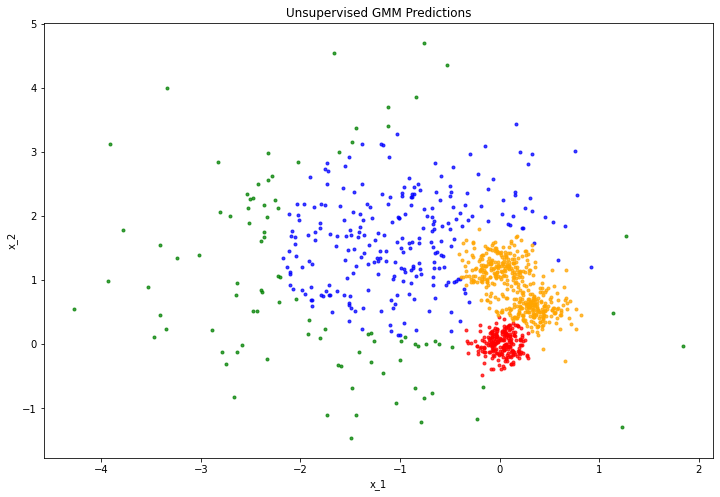

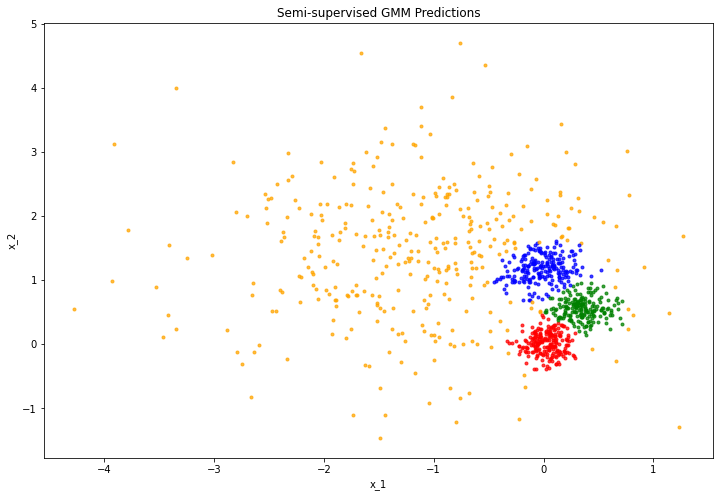

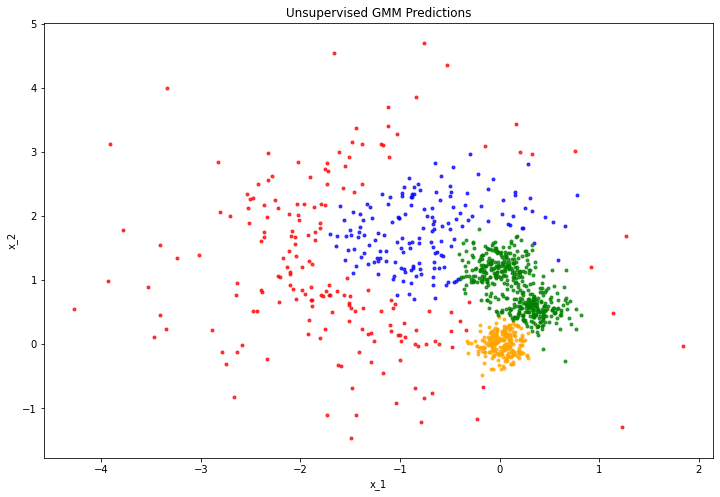

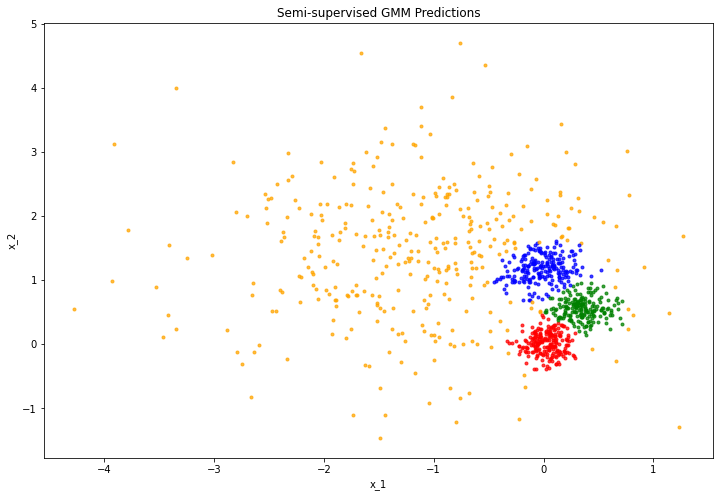

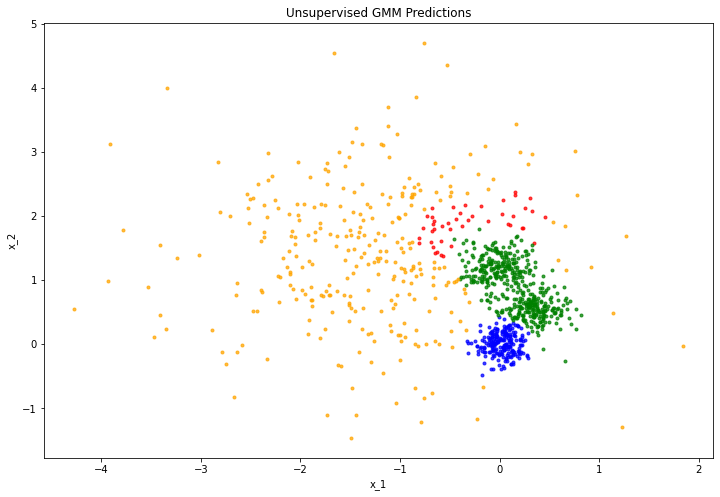

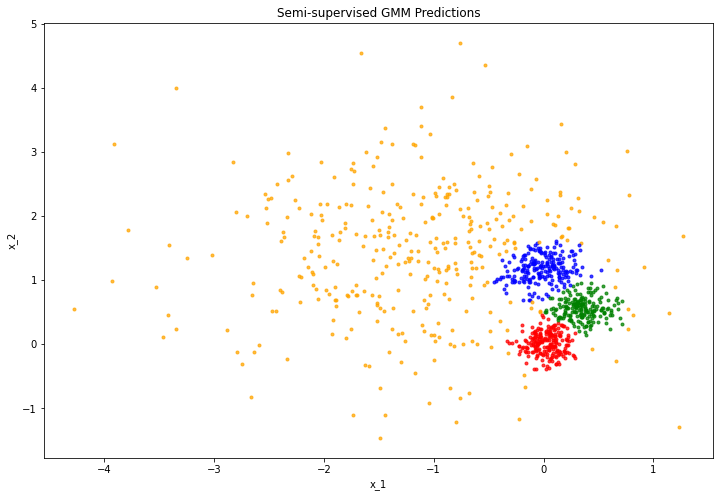

In [9]:
np.random.seed(229)
for t in range(NUM_TRIALS):
    main(is_semi_supervised=False, trial_num=t)
    main(is_semi_supervised=True, trial_num=t)

# 5. K-means for compression

In [13]:
def k_means(points, K):
    eps = 1e-3
    M, N = points.shape
    belongsto = np.zeros(M)
    # Randomly select K points as centroids
    indices = np.arange(M)
    indices = np.random.choice(indices,size=K)
    # (K,N)
    centroids = points[indices].copy()
    
    max_iter = 300
    it = 0
    prev_dist,dist=None,None
    while it < max_iter and (prev_dist is None or abs(dist-prev_dist)>eps):
        it += 1
        prev_dist = dist
        # Assign points to centroids
        # Compute distance
        # (M, K, N)
        diff = points[:,None] - centroids[None]
        dist = np.linalg.norm(diff, axis=2)
        belongsto = np.argmin(dist, axis=1)
        
        # Update centroids
        for i in range(K):
            group = points[belongsto == i]
            centroids[i] = group.mean(axis=0)
        
        dist = np.linalg.norm(points - centroids[belongsto], axis=1).sum()
        print("Iter: {}, Dist:{}".format(it, dist))
        
    return centroids

Iter: 1, Dist:322634.6028137869
Iter: 2, Dist:300566.4387897983
Iter: 3, Dist:289623.6570536146
Iter: 4, Dist:285201.31029763643
Iter: 5, Dist:283398.0462382137
Iter: 6, Dist:282216.33524799196
Iter: 7, Dist:280826.669983968
Iter: 8, Dist:279301.9377371813
Iter: 9, Dist:277571.1311930332
Iter: 10, Dist:275854.9094521134
Iter: 11, Dist:274588.97038261197
Iter: 12, Dist:273868.10448265215
Iter: 13, Dist:273418.1526085966
Iter: 14, Dist:273027.91345830716
Iter: 15, Dist:272789.98015162605
Iter: 16, Dist:272634.41685886786
Iter: 17, Dist:272491.457733495
Iter: 18, Dist:272388.8669906876
Iter: 19, Dist:272338.70991879003
Iter: 20, Dist:272294.04261483764
Iter: 21, Dist:272311.8089707252
Iter: 22, Dist:272312.0589289445
Iter: 23, Dist:272315.5754328581
Iter: 24, Dist:272317.6530027677
Iter: 25, Dist:272331.5452911767
Iter: 26, Dist:272335.1132897539
Iter: 27, Dist:272359.4192797422
Iter: 28, Dist:272380.94573806046
Iter: 29, Dist:272398.7631520769
Iter: 30, Dist:272422.72554490936
Iter: 31, 

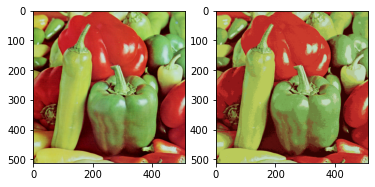

In [14]:
small_path = 'data/peppers-small.tiff'
large_path = 'data/peppers-large.tiff'

small = imread(small_path)
large = imread(large_path)

H, W, C = small.shape
K = 16
points = small.reshape(H * W, C)
centroids = k_means(points.astype(float), K)

diff = large[:, :, None] - centroids[None, None]
dist= np.linalg.norm(diff, axis=3)
# (H, W)
indices = np.argmin(dist, axis=2)
large_new = centroids[indices].astype(np.uint8)
plt.subplot(1, 2, 1)
plt.imshow(large)
plt.subplot(1, 2, 2)
plt.imshow(large_new)
plt.savefig("compressed.png")